In [1]:
# Employee Salary Prediction using Machine Learning

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv(r"C:\Users\JINIA KHATUA\OneDrive\Documents\datasheet.csv")

# Replace "?" with NaN and drop missing values
df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)

# Define features and target
X = df.drop("income", axis=1)
y = df["income"]

# Separate numerical and categorical columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# Full pipeline with Random Forest
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output results
print("Model Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", report)


Model Accuracy: 85.25%

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      6842
        >50K       0.73      0.62      0.67      2203

    accuracy                           0.85      9045
   macro avg       0.81      0.77      0.79      9045
weighted avg       0.85      0.85      0.85      9045



Accuracy: 85.25%

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      6842
        >50K       0.73      0.62      0.67      2203

    accuracy                           0.85      9045
   macro avg       0.81      0.77      0.79      9045
weighted avg       0.85      0.85      0.85      9045



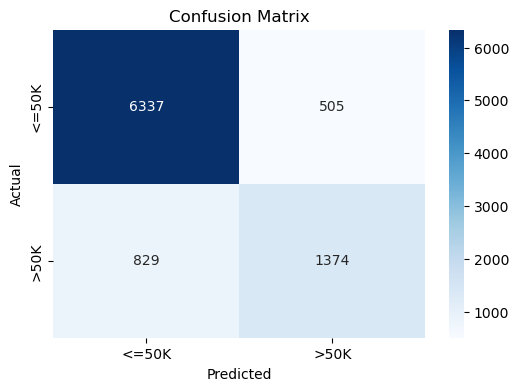

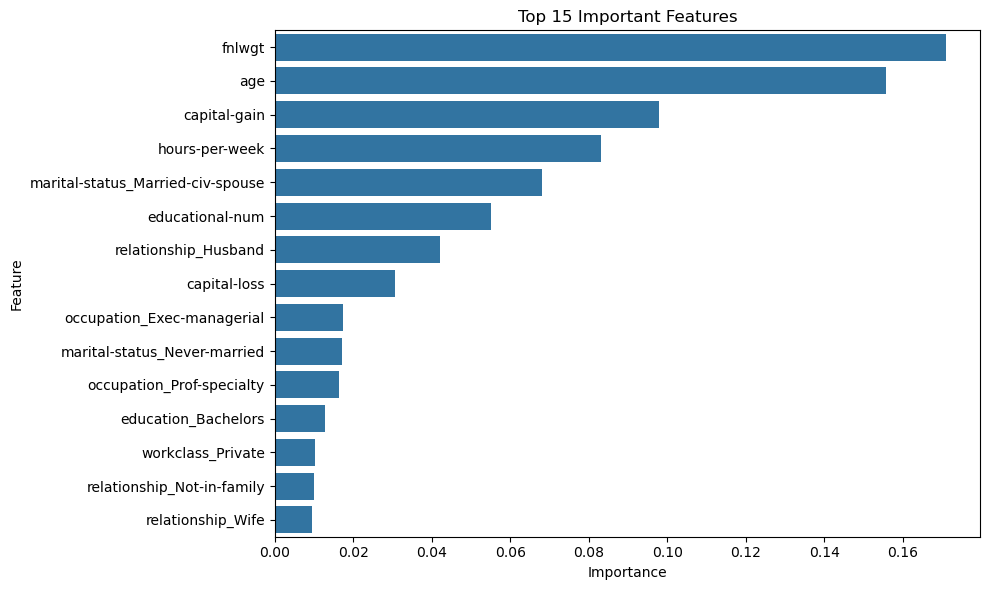

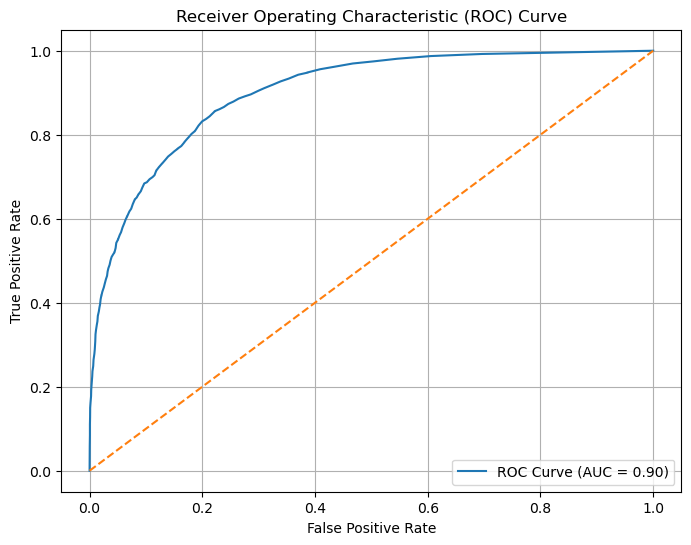

In [2]:
# Employee Salary Prediction with Visualizations

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Load dataset
df = pd.read_csv(r"C:\Users\JINIA KHATUA\OneDrive\Documents\datasheet.csv")
df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)

# Features and target
X = df.drop("income", axis=1)
y = df["income"]

# Columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocessing pipelines
numerical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numerical_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

# Full model
model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --------------------
# 1. Confusion Matrix
# --------------------
cm = confusion_matrix(y_test, y_pred, labels=["<=50K", ">50K"])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --------------------
# 2. Feature Importance
# --------------------
# Get feature names after one-hot encoding
encoded_features = model.named_steps["preprocessor"].transformers_[1][1].named_steps["onehot"].get_feature_names_out(categorical_cols)
feature_names = numerical_cols + list(encoded_features)
importances = model.named_steps["classifier"].feature_importances_

# Plot top 15 features
feat_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_df)
plt.title("Top 15 Important Features")
plt.tight_layout()
plt.show()

# --------------------
# 3. ROC Curve
# --------------------
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test_bin, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()
